 
# <center> Integrating Digital Proficiencies </center>

## <center> Laura Nelson <br/> <em>Assistant Professor of Sociology <br/> Northeastern University </em>  </center> 

### <center> Prepared for the CSSH Leadership Retreat <br/> May 22, 2018 </center>

## Outline

1. An example of digital proficiencies in the social sciences and humanities
2. Digital modules, or, how to bring digital proficiencies into our regular courses
    * Character Space in Antigone
    * Patriot Movement in Boston
3. What would we need to be successful?


************************************

# 1. Digital Proficiencies


## Types of digitial proficiencies: 

text analysis, network analysis, 3D modeling, ethics, algorithmic discrimination, virtual reality, game development, web apps, interactive dashboards, text encoding, database management,computer-human interface, digital access, digital democracy, etc. etc.


## Examples:
1. Foundational digital proficiencies:
    * Basics of your own computer:
        * File structures
        * Primary memory versus secondary memory - long versus short-term memory
        * RAM - your computer's white board
        * CPU - your computer's brain
    * What is a programming language?
    * What is digitized data or material?
    * How does a computer access data via programming languages?
    * What is an algorithm?
    * What is machine learning?
    * What is AI?
2. One type of specialized proficiency: Text Analysis in the Humanities / Social Sciences:
    * Text as a data structure and as evidence in literary analysis
    * What does it mean for a computer to 'read' a text?
    * What is a word, according to a computer, and what are other ways to featurize text?
    * Demystify distance reading and humanities analytics (it's just creative counting!)
    * Integrate close and distance reading
    * Strengths and limitations of text analysis as a method
    * Critical interpretation of the output and how to use it as evidence
    * Ethics of text analysis and algorithms



## Illustrating Example: Counting Words
Can you guess the novel by simply looking at the most frequent content words? What does this tell us about language and substance?

**************************************

In [ ]:
# Prep
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string


# Read Novels from Hard-Drive
text1 = open('../data/text1.txt').read()
text2 = open('../data/text2.txt').read()


# Tokenize Novels
text1_tokens = word_tokenize(text1)
text2_tokens = word_tokenize(text2)


# Set Words to Lower Case
text1_tokens_lower = [word.lower() for word in text1_tokens]
text2_tokens_lower = [word.lower() for word in text2_tokens]


# Remove Stopwords
text1_tokens_nostops = [word for word in text1_tokens_lower if word not in stopwords.words('english')]
text2_tokens_nostops = [word for word in text2_tokens_lower if word not in stopwords.words('english')]


# Remove Punctuation Marks
text1_tokens_clean = [word for word in text1_tokens_nostops if word not in string.punctuation]
text2_tokens_clean = [word for word in text2_tokens_nostops if word not in string.punctuation]

# Tally the Term Frequencies
text1_word_frequency = nltk.FreqDist(text1_tokens_clean)
text2_word_frequency = nltk.FreqDist(text2_tokens_clean)

print("Frequent Words for Text 1",'\t', "Frequent Words for Text 2")
print("_________________________",'\t', "_________________________")

for i in range(20):
    word1, word2 = text1_word_frequency.most_common(20)[i][0], text2_word_frequency.most_common(20)[i][0]
    print('\t',word1, '\t'*(4 - len(word1)//6), word2)
    
    
## Can you guess the novel from most frequent words?

**********************************

# 2. Digital Modules 

## Example 1: Operationalizing

### Illustrating questions: 

What is a protagonist in a play? Who is the protagonist in Sophocles' *Antigone*? How do we know?

### Learning Goals:
* Basic computing skills above, plus
* Operationalizing complex concepts (literary theory: character space)
* Integrating distance reading with close reading
* Incorporating evidence in literary analysis
    * Visulizing evidence
    * Interpreting evidence
* Benefits and limitations to distance reading and humanities analytics


For classes on literature, theater, plays, gender, victorian history, etc.

In [ ]:
# Prep
import pandas

# Import Spreadsheet with Each Character's Lines
dialogue_df = pandas.read_csv('../data/antigone_dialogue.csv', index_col=0)

# Tokenize
dialogue_tokens = [character.split() for character in dialogue_df['DIALOGUE']]

# Count the Number of Tokens per Character
dialogue_df['WORDS_SPOKEN'] = [len(tokens) for tokens in dialogue_tokens]

# List Characters by Number of Words Spoken
dialogue_df = dialogue_df.sort_values('WORDS_SPOKEN', ascending = False)

# Tell Jupyter to Produce Any Visualizations within Notebook
% pylab inline

# Makes images look good
style.use('ggplot')

# Let's visualize!
dialogue_df['WORDS_SPOKEN'].plot(kind='bar')


## Who is the protagonist of Antigone?

*****************************

## Bonus: Student project!

### Gender and Shakespeare

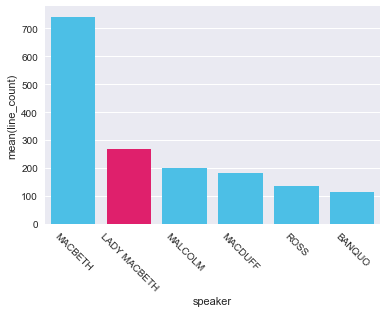

***************************

## Example 2: The power of metadata, and identifying leaders in the Patriot Movement

This framework and data come from a [blog post](https://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/) by sociologist Kieran Healy. He did his analysis using R. I reproduce it here using Python. 

### Illustrating question: 

Can we identify the leaders of the Patriot Movement using only metadata? That is, can we identify the leaders via organizational memberships only, and without knowing anything about what the members were saying or doing?


### Learning Goals:
* Basic computing skills from the first example, plus
* Interpretation and critical thinking skills from first and second example, plus
* Introduction to relational data
* Introduction to metadata, and the power of metadata
* Ethics of data collection and surveillance, relevance to contemporary issues
* How data might be used by police, governments, and in criminology
* Another perspective on the Patriot Movement and American history
* Benefits and limitations of network analysis

For classes in history, social movements, criminology, etc.

In [ ]:
import pandas
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pandas.read_csv("../data/PatriotMovementData.csv", index_col = 0)
df

In [ ]:
#Matrix manipulation!

dfT = df.T
df_matrix = df.as_matrix()
dfT_matrix = dfT.as_matrix()
names_adj = np.dot(df_matrix, dfT_matrix)

#dictionary to label the person nodes

names = list(dfT.columns.values) #list of person names

labels_names = {}

for n in range(0,np.shape(names_adj)[0]):
    labels_names[n] = names[n]

#create graph object
G_names = nx.to_networkx_graph(names_adj,create_using=nx.DiGraph())

#add node labels
nx.relabel_nodes(G_names, labels_names,copy=False)

G_names

In [ ]:
#Network statistics

betweeness_names = nx.betweenness_centrality(G_names, seed = 123)
betweeness_names

Who do you think is the leader of the Patriot Movement?

In [ ]:
#set figure size using matplotlib
plt.figure(figsize=(10,12))

nx.draw(G_names,
    with_labels = True,
    node_color = 'black',
    node_size = 100,
    line_color = 'grey',
    edge_color = 'grey',
    linewidths = 0,
    width = 0.1,
    scale = 16,
    font_size = 12,
    pos = nx.spring_layout(G_names, k=0.35, iterations=50, random_state=1234), 
    )
plt.show()

In [ ]:
#sort by value to find the most central person.
sorted(betweeness_names, key=betweeness_names.get, reverse=True)

# 3. Why digital modules, and what do we need to succeed?

## Consistent, Repeated, *Integrated* Exposure

* Don't segregate digital methods/skills/proficiencies in their own classes, integrate them throughout our curriculum 
* Course-specific modules demonstrate how these methods are related to what students are actually interested in, and integrates them into existing ways of knowing
* At minimum, students will learn new skills and will be better equipped to be critical consumers of these methods 
* Some may be interested enough to take full courses! (Make sure they know where to go if they want more)

## What do we need for success?

1. Open faculty, ready to devote a class or week to these methods/skills
2. Trained graduate students to develop course-specific modules, working with faculty teaching the course
    * illustrating example 
    * learning goals
    * focus on pedagogy
3. Computing resources, to guarantee equal access and pedagogical success
    * Final example: [computing in the cloud](https://github.com/lknelson/reproducibility-example)